<a href="https://colab.research.google.com/github/sylv0303/Git/blob/main/Fama_French%E2%80%99s_5_factor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation and testing of Fama French’s 5-factor model

In Asset Pricing, the excess return on a stock is broken down as follows:

$$
R_{it}-RF_{t} = \alpha_{i} +\sum_{j=1}^{k} \beta_{i}^{j} f_{jt} + e_{it}
$$
Where
- $R_{it}$ is the return of the stock *i* on date *t*,
- $RF_{t}$ is the risk-free rate on date *t*,
- the $f_{it}, i=1,..,k$ are *k* factors explaining common variations in returns and non-diversifiable risk
- the $\beta_{i}^{j},j=1...,k$ is the exposure of the asset *i* to the factor $f_{jt}$
- $e_{it}$ is the component specific to the asset *i* representing the diversifiable risk with $E(e_{it})=0$

If the factors are correctly chosen, that is to say they represent the variations in expected returns, we will have $\alpha_{i}=0$

**Fama and French (1993)** (Common risk factors in the returns on stocks and bonds, Journal of Financial Economics, 33 (1), pp. 3-56) propose a three-factor model to analyze returns stocks or stock portfolios.
In the 3-factor model, the average return of a stock is assumed to be correlated with:

1. The return on the market portfolio corrected for the risk-free rate: $Mkt-RF$
2. The *Size* of the company measured by its market capitalization (number of shares in circulation $\times$ price of a share).
     - This effect is measured by the factor $SMB_{t}$ equal to the difference in return of a portfolio of small companies minus that of a portfolio of large companies.
3. The book to market ratio *B/M* (ratio of book value and market value). A company with a high B/M ratio will be rather undervalued and is expected to have a high rate of return.
     - This effect is measured by the factor $HML_{t}$ calculated as the difference in returns between portfolios with high and low B/M ratios.

These three factors cannot fully explain the variations in expected returns. **Fama and French (2015)** ('A five-factor asset pricing model', Journal of Financial Economics, 116 1-22) add two additional factors taking into account:

4. The anticipated profitability of companies: higher anticipated earnings tend to increase the rate of return (all other things being equal). The $RMW_{t}$ factor is the difference in returns between a portfolio of companies with high (robust) and low (weak) profitability.
5. Anticipated corporate investments: higher investments tend to reduce the rate of return (less dividends therefore smaller market value). The $CMA_{t}$ factor is the difference between a portfolio of companies with a low level of investment (conservative) and companies with a high level of investment (aggressive)

The objective of this sheet will be to use these factors to estimate the decomposition of the returns of a set of stock portfolios from the NYSE, AMEX and Nasdaq.
We will check to what extent these factors correctly explain the anticipated returns.

    
The data can be found on the Kenneth French website
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
    
    
**In parts III and IV, estimates must be made over the period 1963-07-01 to 2023-07-01**


**You can add your answers (codes, display and comments of results) directly in the notebook. You save it with your name.**

## I. The 5 factors of Fama-French

#### 1. Data import

The Fama-French 5 factor data is stored in the file "F-F_Research_Data_5_Factors_2x3.csv".

Import monthly observations of these factors from "1963-07-01".

In [ ]:
#import csv

import pandas as pd
#file path
file_path = '/content/F-F_Research_Data_5_Factors_2x3 monthly.csv'
#read csv as data frame
df=pd.read_csv(file_path,skiprows=3)
#show me first few rows
df.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27
1,196308,5.07,-0.80,1.80,0.36,-0.35,0.25
2,196309,-1.57,-0.52,0.13,-0.71,0.29,0.27
3,196310,2.53,-1.39,-0.10,2.80,-2.01,0.29
4,196311,-0.85,-0.88,1.75,-0.51,2.24,0.27


#### 2. Checking for missing variables

**Because of the output of the cell above we now know that the relevant variables were read correctly, we found $Mkt$, $RF$, $SMB_{t}$, $HML_{t}$ and the additional two variables for 5-factor Model $RMW_{t}$, $CMA_{t}$ we now verify below whether the associated data is also correct**

In [ ]:
#verify shape and the fact that we don't miss values
df.info()
#detect missing or NaN (Not a Number) values in a DataFrame
print('\n')
print("Each element is True if the corresponding element in the original DataFrame is missing (NaN) and False otherwise")
missing_values=df.isna()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    723 non-null    int64  
 1   Mkt-RF  723 non-null    float64
 2   SMB     723 non-null    float64
 3   HML     723 non-null    float64
 4   RMW     723 non-null    float64
 5   CMA     723 non-null    float64
 6   RF      723 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 39.7 KB


Each element is True if the corresponding element in the original DataFrame is missing (NaN) and False otherwise
      Date  Mkt-RF    SMB    HML    RMW    CMA     RF
0    False   False  False  False  False  False  False
1    False   False  False  False  False  False  False
2    False   False  False  False  False  False  False
3    False   False  False  False  False  False  False
4    False   False  False  False  False  False  False
..     ...     ...    ...    ...    ...    ...    ...
718  False   False 

**As we can see above, we are not missing any data and the shape matches perfectly**

#### 3. Date formatting + Risk-free rate

1. Transform dates into dataframe index
2. Store the risk-free rate in a new DataFrame
3. Store the 5 factors presented above in a new DataFrame

In [ ]:
#1
#set dates as the indices
df.set_index('Date', inplace = True)
df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27
196308,5.07,-0.80,1.80,0.36,-0.35,0.25
196309,-1.57,-0.52,0.13,-0.71,0.29,0.27
196310,2.53,-1.39,-0.10,2.80,-2.01,0.29
196311,-0.85,-0.88,1.75,-0.51,2.24,0.27


In [ ]:
#convert dates to datetime format
df.index = pd.to_datetime(df.index, format='%Y%m')
df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.39,-0.41,-0.97,0.68,-1.18,0.27
1963-08-01,5.07,-0.80,1.80,0.36,-0.35,0.25
1963-09-01,-1.57,-0.52,0.13,-0.71,0.29,0.27
1963-10-01,2.53,-1.39,-0.10,2.80,-2.01,0.29
1963-11-01,-0.85,-0.88,1.75,-0.51,2.24,0.27


In [ ]:
#2
#risk-free rate in new dataframe
risk_free_rate_df = df[['RF']].copy()
risk_free_rate_df.head()

,RF
Date,
1963-07-01,0.27
1963-08-01,0.25
1963-09-01,0.27
1963-10-01,0.29
1963-11-01,0.27


In [ ]:
#3
#five factors in new dataframe
factors=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
five_factor_df = df[factors].copy()
five_factor_df.head()

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
1963-07-01,-0.39,-0.41,-0.97,0.68,-1.18
1963-08-01,5.07,-0.80,1.80,0.36,-0.35
1963-09-01,-1.57,-0.52,0.13,-0.71,0.29
1963-10-01,2.53,-1.39,-0.10,2.80,-2.01
1963-11-01,-0.85,-0.88,1.75,-0.51,2.24


#### 4. Graphical representation of factors

Plot the 5 factors

<function matplotlib.pyplot.show(close=None, block=None)>

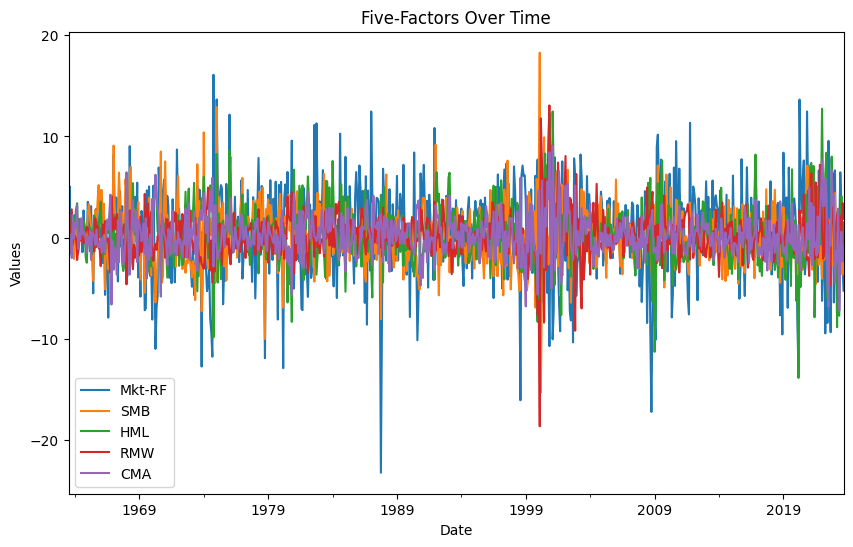

In [ ]:
import matplotlib.pyplot as plt
#convert columns to numeric values
five_factor_df = five_factor_df.apply(pd.to_numeric, errors='coerce')
#plot all factors together
five_factor_df.plot(figsize=(10, 6), title='Five-Factors Over Time', xlabel='Date', ylabel='Values')
plt.show

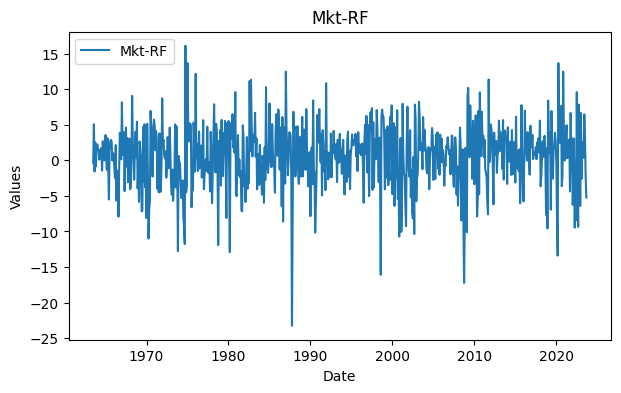

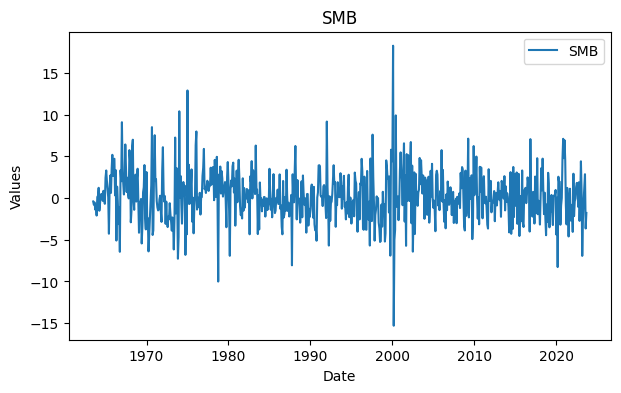

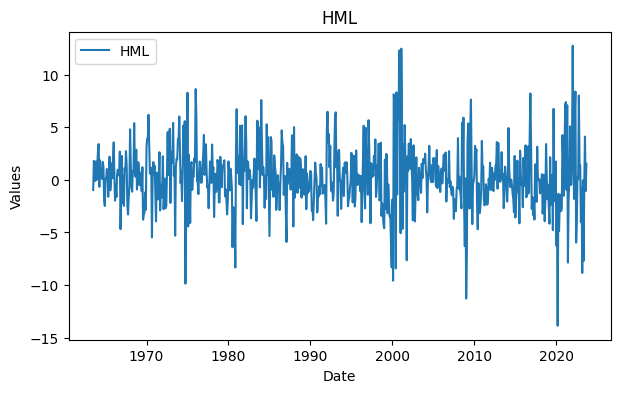

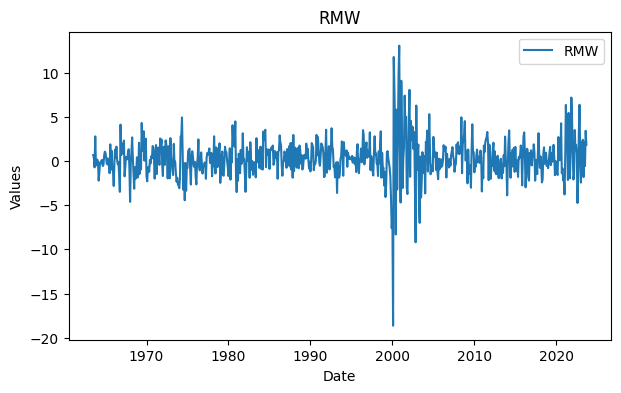

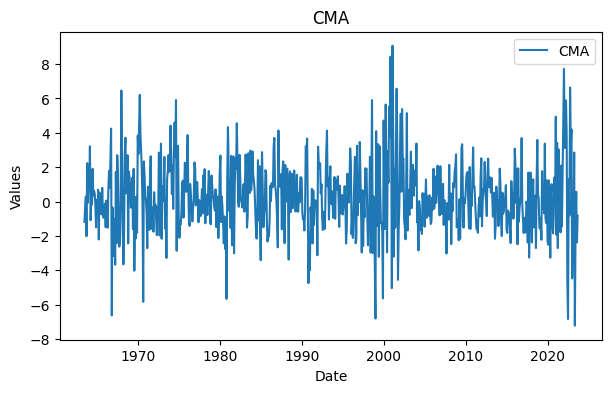

In [ ]:
#plot each factor
for column in five_factor_df.columns:
  plt.figure(figsize=(7, 4))
  plt.plot(df.index, df[column], label=column)
  plt.title(f'{column}')
  plt.xlabel('Date')
  plt.ylabel('Values')
  plt.legend()
  plt.show()

#### 5. Descriptive statistics

Calculate the mean, maximum, minimum, standard deviation, skewness, kurtosis for each factor

     - for the entire sample
     - per year
     - per month

**Since we want to calculate the stats on monthly and on yearly basis, we write an abstract function which calculates all the stats and we apply this on the montly and yearly dataset.**

In [ ]:
from scipy.stats import skew, kurtosis
#calculate the stats
def stats(data):
  for column in data.columns:
    mean_val = data[column].mean()
    max_val = data[column].max()
    min_val = data[column].min()
    std_dev = data[column].std()
    skewness = skew(data[column])
    kurt = kurtosis(data[column])

    print(f'Column: {column}')
    print(f'Mean: {mean_val}')
    print(f'Maximum: {max_val}')
    print(f'Minimum: {min_val}')
    print(f'Standard Deviation: {std_dev}')
    print(f'Skewness: {skewness}')
    print(f'Kurtosis: {kurt}')
    #space after every output
    print('\n')

In [ ]:
#monthly
stats(five_factor_df)

Column: Mkt-RF
Mean: 0.5558921161825726
Maximum: 16.1
Minimum: -23.24
Standard Deviation: 4.491111736025288
Skewness: -0.49768441982829975
Kurtosis: 1.7302710436198296


Column: SMB
Mean: 0.21118948824343015
Maximum: 18.28
Minimum: -15.32
Standard Deviation: 3.0233878231908053
Skewness: 0.3303635315349204
Kurtosis: 3.0352176015769903


Column: HML
Mean: 0.2835684647302905
Maximum: 12.75
Minimum: -13.87
Standard Deviation: 2.995500132438034
Skewness: 0.07522199649879915
Kurtosis: 2.2859757529669382


Column: RMW
Mean: 0.2906500691562932
Maximum: 13.07
Minimum: -18.65
Standard Deviation: 2.2195990486877557
Skewness: -0.27215745563046867
Kurtosis: 11.02488730760904


Column: CMA
Mean: 0.27432918395573996
Maximum: 9.07
Minimum: -7.22
Standard Deviation: 2.0800423997030997
Skewness: 0.2627730088526065
Kurtosis: 1.4424817391356166




**So far we have only been asked to upload the 5 factors on a monthly basis, this time we also need a data frame of the data on an annual basis, for consistency reasons we are now also creating a DataFrame for the annual data set analogous to the one on a monthly basis**

In [ ]:
#preprocess

#file path
file_path = '/content/F-F_Research_Data_5_Factors_2x3 yearly.csv'
#read csv as data frame
df_yearly=pd.read_csv(file_path,skiprows=3)
#set dates as the indices
df_yearly.set_index('Date', inplace = True)
#convert dates to datetime format
df_yearly.index = pd.to_datetime(df_yearly.index, format='%Y')
#five factors in new dataframe
five_factor_df_yearly = df_yearly[factors].copy()
#have a quick look
five_factor_df_yearly.head()

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
1964-01-01,12.54,0.47,9.72,-3.34,6.87
1965-01-01,10.52,24.45,7.11,-0.93,-3.38
1966-01-01,-13.51,2.37,-0.86,0.00,-0.79
1967-01-01,24.49,50.51,-8.14,7.90,-15.31
1968-01-01,8.79,25.96,18.56,-13.60,16.53


In [ ]:
#validate shape and missing numbers for the five factors
five_factor_df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 1964-01-01 to 2022-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  59 non-null     float64
 1   SMB     59 non-null     float64
 2   HML     59 non-null     float64
 3   RMW     59 non-null     float64
 4   CMA     59 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


**Looks good, no null values ​​and the dimension is correct, now let's apply our function to our dataframe**

In [ ]:
stats(five_factor_df_yearly)

Column: Mkt-RF
Mean: 7.111864406779661
Maximum: 35.2
Minimum: -38.34
Standard Deviation: 17.803923189758336
Skewness: -0.6409147718169759
Kurtosis: -0.31725171516294504


Column: SMB
Mean: 3.1459322033898296
Maximum: 50.51
Minimum: -28.03
Standard Deviation: 13.453798863421193
Skewness: 0.6792497539556054
Kurtosis: 1.3792575110642122


Column: HML
Mean: 4.0111864406779665
Maximum: 44.98
Minimum: -46.67
Standard Deviation: 15.860831182805905
Skewness: -0.41841767351057213
Kurtosis: 0.8994433014262171


Column: RMW
Mean: 3.541186440677966
Maximum: 26.69
Minimum: -28.04
Standard Deviation: 9.59055139990896
Skewness: -0.40139660861021553
Kurtosis: 1.494060152807732


Column: CMA
Mean: 3.7608474576271185
Maximum: 30.71
Minimum: -15.31
Standard Deviation: 10.093714037089445
Skewness: 0.3297705476629786
Kurtosis: -0.18743739347641242




#### 6. Correlation matrix
1. Estimate the factor correlation matrix and comment
2. Make a graphical representation of this matrix
3. Check the significance of the correlation between the factors $HML$ and $SMB$

**It is useful to analyze correlations in different time periods to get a more comprehensive understanding of the relationships between the time series. Monthly views may capture short-term fluctuations and seasonal patterns, while annual views may better capture long-term trends and cyclical patterns.**

In [ ]:
#1
#estimate the correlation matrix of the five factors
correlation_matrix_monthly = five_factor_df.corr()
correlation_matrix_yearly = five_factor_df_yearly.corr()
#monthly
print('Factor Correlation on monthly basis')
print(correlation_matrix_monthly)
print('\n')
#yearly
print('Factor Correlation on yearly basis')
print(correlation_matrix_yearly)

Factor Correlation on monthly basis
          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.280470 -0.209185 -0.180923 -0.361115
SMB     0.280470  1.000000 -0.014685 -0.352044 -0.093437
HML    -0.209185 -0.014685  1.000000  0.088654  0.686378
RMW    -0.180923 -0.352044  0.088654  1.000000 -0.012526
CMA    -0.361115 -0.093437  0.686378 -0.012526  1.000000


Factor Correlation on yearly basis
          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.215835 -0.274866 -0.207765 -0.389728
SMB     0.215835  1.000000  0.101407 -0.171307 -0.016978
HML    -0.274866  0.101407  1.000000  0.175881  0.772699
RMW    -0.207765 -0.171307  0.175881  1.000000 -0.030606
CMA    -0.389728 -0.016978  0.772699 -0.030606  1.000000


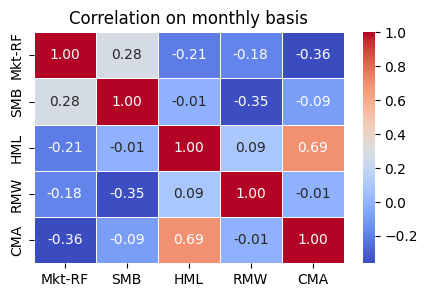

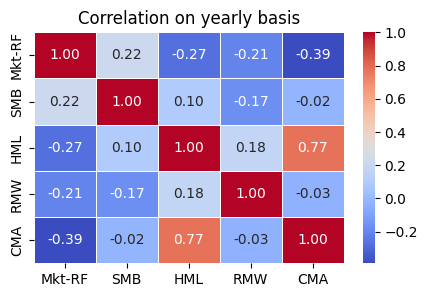

In [ ]:
#2
import seaborn as sns
#to make the graphical representation we use heatmaps
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix_monthly, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation on monthly basis')
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix_yearly, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation on yearly basis')
plt.show()

**To check significance we need to calculate a correlation coefficient in a suitable way for time series data.**

Bravais Pearson correlation coefficient it is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations.
It's Sensitive to linear relationships. If the relationship is not linear, the Pearson coefficient may not accurately capture the true relationship. To get a good overview we use *Spearman* correlation coefficient as well.It's Robust to non-linear relationships. It evaluates the strength and direction of the monotonic relationship between ranks.

In [ ]:
#3
#significance functions
from scipy.stats import pearsonr, spearmanr
#linear case with Bravais-Pearson
def significance_linear(series1, series2):
  corr_coeff, p_value = pearsonr(series1, series2)
  significance = p_value < 0.05
  return corr_coeff, p_value, significance

#Non-linear case with Charles Spearman, to be robust against Outlier
def significance_non_linear(series1, series2, alpha=0.05):
  correlation_coefficient, p_value = spearmanr(series1, series2)
  significance = p_value < alpha
  return correlation_coefficient, p_value, significance

#function inputs
#monthly
series1 = five_factor_df['HML']
series2 = five_factor_df['SMB']
#yearly
series1_yearly = five_factor_df_yearly['HML']
series2_yearly = five_factor_df_yearly['SMB']

In [ ]:
#significance linear case

#monthly
print('Monthly Data')
#apply pearson function
correlation_coefficient, p_value, significance = significance_linear(series1, series2)
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Significance linear case: {significance}')
print('\n')

#yearly
print('Yearly Data')
#apply pearson function
correlation_coefficient, p_value, significance = significance_linear(series1_yearly, series2_yearly)
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Significance linear case: {significance}')

Monthly Data
Correlation Coefficient: -0.0147
P-value: 0.6934
Significance linear case: False


Yearly Data
Correlation Coefficient: 0.1014
P-value: 0.4447
Significance linear case: False


**No significance here for alpha=0.05**

In [ ]:
#significance
#monthly
#apply spearman function
print('monthly')
#apply spearman function
correlation, p_value, is_significant = significance_non_linear(series1, series2)
print(f'Correlation Coefficient: {correlation:.4f}')
print(f'P-Value: {p_value:.4f}')
print(f'Significance non linear case: {is_significant}')
print('\n')

#yearly
print('yearly')
#apply spearman function
correlation, p_value, is_significant = significance_non_linear(series1_yearly, series2_yearly)
print(f'Correlation Coefficient: {correlation:.4f}')
print(f'P-Value: {p_value:.4f}')
print(f'Significance non linear case: {is_significant}')

monthly
Correlation Coefficient: -0.0227
P-Value: 0.5427
Significance non linear case: False


yearly
Correlation Coefficient: 0.1659
P-Value: 0.2092
Significance non linear case: False


## II. The 25 portfolios formed from Size and OP

We import the returns of 25 portfolios formed from NYSE, AMEX and NASDAQ securities for which we have all the quotations.
These shares are divided into 25 portfolios obtained by crossing the *Size*
- divided into 5 categories of SMALL or ME1/ME2/ME3/ME4/BIG or ME5

and the ratio *OP* : Operating Profitability

- divided into 5 categories of LoOP or OP1/OP2/OP3/OP4/HiOP or OP5

This data can be found in the file "25_Portfolios_ME_OP_5x5_Wout_Div.CSV"

#### 1. Data import

1. Import the data
2. Transform the dates into yyyy-mm-01 format (example 196307 becomes 1963-07-01)
3. Transform dates into indices

**We decided to move on with the *value weighted Returns*, since its the same analysis - we could quickly change the path to another Data set, I could check the results**

In [ ]:
#1.
#import csv
import pandas as pd
#file path
Average_Value_Weighted_Returns_path = '/content/Average Value Weighted Returns.csv'
#read csv as data frame
df_value=pd.read_csv(Average_Value_Weighted_Returns_path,skiprows=1, encoding='latin1')
# 2. & 3.
#set dates as the indices
df_value.set_index('Date', inplace = True)
#convert dates to datetime format
df_value.index = pd.to_datetime(df_value.index, format='%Y%m')

In [ ]:
#show me first few rows for validation
df_value.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,ME2 OP5,...,ME4 OP1,ME4 OP2,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP
Date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,-0.6705,1.2181,2.4664,-0.9614,-1.1993,-1.2551,-2.1457,-1.1506,0.6419,0.3073,...,-3.6017,-0.6540,-2.1827,-1.4483,-0.0358,0.2036,1.3578,-0.0689,-1.1041,0.6455
1963-08-01,2.1994,3.6919,2.2153,2.3272,4.0410,6.2016,5.4030,3.4699,4.6566,3.5437,...,4.8709,4.9670,5.9343,4.1942,6.2595,4.1981,3.6953,4.7542,5.3736,5.4765
1963-09-01,-1.5825,-1.1712,-2.2143,4.0691,-1.6038,-1.9994,-1.9601,-0.0890,-2.5102,-4.2698,...,-1.9026,-1.4033,-2.5062,-3.0080,-2.4167,-2.5485,-2.3196,0.8222,-2.0080,-1.3054
1963-10-01,0.1584,-1.0551,1.1348,3.0337,0.2181,3.5349,2.9549,1.0929,-1.4399,4.6419,...,2.9412,0.2448,1.6633,-0.8305,2.9515,-0.1189,-0.1349,2.2829,2.9912,7.7337
1963-11-01,-2.3473,-1.7879,-3.6168,-2.6146,-3.3887,-1.6161,-0.7255,-0.3999,-1.6184,-2.3957,...,-0.5446,-1.5143,-0.5209,-0.7213,0.3579,-1.6703,-1.8024,0.7283,0.3042,-3.8383


#### 2. Calculate the excess returns $R_{it} -RF_{t}$

**In task 1 we moved the RF column to a new frame. We will now use this frame to calculate $R_{it} -RF_{t}$**

In [ ]:
#for well-definedness we check if the shape of our Portfolio and the RF matches by row
risk_free_rate_df.info()
df_value.info()

**The Row Dimension matches**


In [ ]:
#R_i_t - RF_t
#value_weighted
result_value_df= df_value - risk_free_rate_df.values
result_value_df.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,ME2 OP5,...,ME4 OP1,ME4 OP2,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP
Date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,-0.9405,0.9481,2.1964,-1.2314,-1.4693,-1.5251,-2.4157,-1.4206,0.3719,0.0373,...,-3.8717,-0.9240,-2.4527,-1.7183,-0.3058,-0.0664,1.0878,-0.3389,-1.3741,0.3755
1963-08-01,1.9494,3.4419,1.9653,2.0772,3.7910,5.9516,5.1530,3.2199,4.4066,3.2937,...,4.6209,4.7170,5.6843,3.9442,6.0095,3.9481,3.4453,4.5042,5.1236,5.2265
1963-09-01,-1.8525,-1.4412,-2.4843,3.7991,-1.8738,-2.2694,-2.2301,-0.3590,-2.7802,-4.5398,...,-2.1726,-1.6733,-2.7762,-3.2780,-2.6867,-2.8185,-2.5896,0.5522,-2.2780,-1.5754
1963-10-01,-0.1316,-1.3451,0.8448,2.7437,-0.0719,3.2449,2.6649,0.8029,-1.7299,4.3519,...,2.6512,-0.0452,1.3733,-1.1205,2.6615,-0.4089,-0.4249,1.9929,2.7012,7.4437
1963-11-01,-2.6173,-2.0579,-3.8868,-2.8846,-3.6587,-1.8861,-0.9955,-0.6699,-1.8884,-2.6657,...,-0.8146,-1.7843,-0.7909,-0.9913,0.0879,-1.9403,-2.0724,0.4583,0.0342,-4.1083


#### 3. Calculation of descriptive statistics

Calculate the average returns for each portfolio. What can you say about the relationship between average yield and
- the *Size* ?
- the *OP* ?

In [ ]:
#average for each portfolio

#df_value
column_averages = {}
for column in df_value.columns:
  column_averages[column] = df_value[column].mean()
#show me the averages
for column, average in column_averages.items():
  print(f"Column '{column}' Average: {average}")
print('\n')

Column 'SMALL LoOP' Average: 0.8055208852005531
Column 'ME1 OP2' Average: 1.1332131396957124
Column 'ME1 OP3' Average: 1.0633409405255878
Column 'ME1 OP4' Average: 1.2154672199170125
Column 'SMALL HiOP' Average: 1.0730391424619639
Column 'ME2 OP1' Average: 0.8315542185338864
Column 'ME2 OP2' Average: 0.9485233748271094
Column 'ME2 OP3' Average: 0.9644479944674965
Column 'ME2 OP4' Average: 0.9846836791147996
Column 'ME2 OP5' Average: 1.1753846473029046
Column 'ME3 OP1' Average: 0.7346305670816043
Column 'ME3 OP2' Average: 0.8476089903181189
Column 'ME3 OP3' Average: 0.8852463347164591
Column 'ME3 OP4' Average: 0.9472673582295988
Column 'ME3 OP5' Average: 1.1240746887966806
Column 'ME4 OP1' Average: 0.7418239280774551
Column 'ME4 OP2' Average: 0.7939019363762102
Column 'ME4 OP3' Average: 0.8260982019363762
Column 'ME4 OP4' Average: 0.8929135546334718
Column 'ME4 OP5' Average: 0.9960640387275242
Column 'BIG LoOP' Average: 0.46770262793914247
Column 'ME5 OP2' Average: 0.528428907330567
Col

we need to say something about operating profability and Size in combination with averages

## III. Estimation of the factor model


For each asset *i*, we have T observations ${r_{i1},...,r_{iT}}$. We can estimate the following three regressions:
    
### Regression on the market factor
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+e_{it}$$

### Regression on the 3 factors
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{ t}+e_{it}$$

### Regression on the 5 factors
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{ t}+r_{i}RMW_{t}+c_{i}CMA_{t}+e_{it}$$

- $R_{Ft}$ is the risk-free rate
- $R_{MT}$ is the market portfolio rate of return
- The residual $e_{it}$ represents the idiosyncratic risk (or diversifiable risk) of each asset.
- $\beta_{i}, s_{i}, h_{i},r_{i}, c_{i}$ represent the exposures to each of the factors
- $\alpha_{i}$ is the constant. According to efficient portfolio theory, we expect to have $a_{i}=0$. This hypothesis can also be justified by the proposition that all the factors represent all the risk factors.

#### 1. Construct a function to estimate these three regressions. You will keep as output:

1. the estimated coefficients
2. the tstat of the estimated coefficients
3. the residuals of the regressions
4. The average of constants in absolute value

In [ ]:
#preprocess
#we need to loop over portfolio names, so here is the list of names we use later
portfolio_names = result_value_df.columns.tolist()
print(portfolio_names)

['SMALL LoOP', 'ME1 OP2', 'ME1 OP3', 'ME1 OP4', 'SMALL HiOP', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME2 OP4', 'ME2 OP5', 'ME3 OP1', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME3 OP5', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP4', 'ME4 OP5', 'BIG LoOP', 'ME5 OP2', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']


In [ ]:
import statsmodels.api as sm
import pandas as pd
#data ist for 'result_value_df'
#market_factor = five_factor_df[['Mkt-RF']]
#three_factors = five_factor_df[[...,...,...]]
#five_factors = five_factor_df[[...,...,...,...,...]]
#portfolio_names = all columns names

def estimate_factor_models_modified(data, market_factor, three_factors, five_factors, portfolio_names):
  results = {}
  for portfolio in portfolio_names:
      results[portfolio] = {}
      #regression on the market factor
      X = sm.add_constant(market_factor)
      model = sm.OLS(data[portfolio], X).fit()
      results[portfolio]['market'] = {
          'coefficients': model.params,
          'tstats': model.tvalues,
          'residuals': model.resid,
          'avg_abs_alpha': abs(model.params[0])
      }
      #regression on the 3 factors
      X = sm.add_constant(three_factors)
      model = sm.OLS(data[portfolio], X).fit()
      results[portfolio]['three_factors'] = {
          'coefficients': model.params,
          'tstats': model.tvalues,
          'residuals': model.resid,
          'avg_abs_alpha': abs(model.params[0])
      }
      #regression on the 5 factors
      X = sm.add_constant(five_factors)
      model = sm.OLS(data[portfolio], X).fit()
      results[portfolio]['five_factors'] = {
          'coefficients': model.params,
          'tstats': model.tvalues,
          'residuals': model.resid,
          'avg_abs_alpha': abs(model.params[0])
      }
  return results

In [ ]:
#apply the function
results = estimate_factor_models_modified(result_value_df, five_factor_df[['Mkt-RF']], five_factor_df[['Mkt-RF', 'SMB', 'HML']], five_factor_df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']], portfolio_names)
print(results)

{'SMALL LoOP': {'market': {'coefficients': const    -0.262749
Mkt-RF    1.269834
dtype: float64, 'tstats': const     -1.516377
Mkt-RF    33.141554
dtype: float64, 'residuals': Date
1963-07-01   -0.182516
1963-08-01   -4.225908
1963-09-01    0.403888
1963-10-01   -3.081531
1963-11-01   -1.275193
                ...   
2023-05-01    2.286007
2023-06-01   -5.238077
2023-07-01    0.274582
2023-08-01   -8.085349
2023-09-01   -2.568523
Length: 723, dtype: float64, 'avg_abs_alpha': 0.26274865489062166}, 'three_factors': {'coefficients': const    -0.366133
Mkt-RF    0.989554
SMB       1.393161
HML      -0.123536
dtype: float64, 'tstats': const     -4.321655
Mkt-RF    49.923390
SMB       48.381019
HML       -4.330310
dtype: float64, 'residuals': Date
1963-07-01    0.262925
1963-08-01   -1.364613
1963-09-01    0.807737
1963-10-01   -0.344899
1963-11-01    0.032125
                ...   
2023-05-01    2.063189
2023-06-01   -5.223042
2023-07-01   -2.199041
2023-08-01   -3.697744
2023-09-01   -1.25

**To have a better overview over the output we give a Summary for every Portfolio below**


In [ ]:
#print summary function
def print_regression_summary(results):
  for portfolio, portfolio_results in results.items():
      print(f"Portfolio: {portfolio}\n")
      for model_name, model_results in portfolio_results.items():
          print(f"  Model: {model_name}")
          print("    Coefficients:")
          print(model_results['coefficients'])
          print("    t-Statistics:")
          print(model_results['tstats'])
          print(f"    Average absolute alpha: {model_results['avg_abs_alpha']}")
          print("    Residuals (first 5):")
          print(model_results['residuals'].head())
          print("-" * 50)

In [ ]:
#apply the function
print_regression_summary(results)

Portfolio: SMALL LoOP

  Model: market
    Coefficients:
const    -0.262749
Mkt-RF    1.269834
dtype: float64
    t-Statistics:
const     -1.516377
Mkt-RF    33.141554
dtype: float64
    Average absolute alpha: 0.26274865489062166
    Residuals (first 5):
Date
1963-07-01   -0.182516
1963-08-01   -4.225908
1963-09-01    0.403888
1963-10-01   -3.081531
1963-11-01   -1.275193
dtype: float64
--------------------------------------------------
  Model: three_factors
    Coefficients:
const    -0.366133
Mkt-RF    0.989554
SMB       1.393161
HML      -0.123536
dtype: float64
    t-Statistics:
const     -4.321655
Mkt-RF    49.923390
SMB       48.381019
HML       -4.330310
dtype: float64
    Average absolute alpha: 0.36613337232428134
    Residuals (first 5):
Date
1963-07-01    0.262925
1963-08-01   -1.364613
1963-09-01    0.807737
1963-10-01   -0.344899
1963-11-01    0.032125
dtype: float64
--------------------------------------------------
  Model: five_factors
    Coefficients:
const    -0.17

From here we decided to work with the value weighted Portfolio

#### 2. Estimate coefficient
1. Calculate and give the names of the portfolios for which the market portfolio return coefficient is

- greater than 1
- equal to 1
- less than 1

2. For each of the HML, SMB and CMA factors, give:
    
- the number of assets for which each of the factors taken one by one is not significant
- the names of the portfolio concerned

Which factors do not seem to you to have any explanatory power in the variations in yields?

**Since we already have the Regression analysis we write a function as required above in 2.1 and 2.2**

In [ ]:
#2.1 & 2.2 in one function
def analyze_coefficients(results):
  greater_than_one = []
  equal_to_one = []
  less_than_one = []

  #this is for counting the number of non-significant assets for each factor
  non_significant_count = {'SMB': 0, 'HML': 0, 'CMA': 0}
  non_significant_assets = {'SMB': [], 'HML': [], 'CMA': []}
  #loop
  for portfolio, portfolio_results in results.items():
      #2.1 Market portfolio return coefficient analysis
      market_coeff = portfolio_results['market']['coefficients']['Mkt-RF']
      if market_coeff > 1:
          greater_than_one.append(portfolio)
      elif market_coeff == 1:
          equal_to_one.append(portfolio)
      elif market_coeff < 1:
          less_than_one.append(portfolio)
      #analyze significance of HML, SMB, CMA factors
      for factor in ['SMB', 'HML', 'CMA']:
          #check if the factor is in the regression model
          if factor in portfolio_results['five_factors']['coefficients']:
              #check if t-statistic is not significant (using 1.96 for 95% confidence level)
              if abs(portfolio_results['five_factors']['tstats'][factor]) < 1.96:
                  non_significant_count[factor] += 1
                  non_significant_assets[factor].append(portfolio)
  return {
      "greater_than_one": greater_than_one,
      "equal_to_one": equal_to_one,
      "less_than_one": less_than_one,
      "non_significant_count": non_significant_count,
      "non_significant_assets": non_significant_assets
  }

In [ ]:
#apply the function
analysis_results = analyze_coefficients(results)
print(analysis_results)

{'greater_than_one': ['SMALL LoOP', 'ME1 OP2', 'ME1 OP3', 'ME1 OP4', 'SMALL HiOP', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME2 OP4', 'ME2 OP5', 'ME3 OP1', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME3 OP5', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP4', 'ME4 OP5', 'BIG LoOP'], 'equal_to_one': [], 'less_than_one': ['ME5 OP2', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP'], 'non_significant_count': {'SMB': 0, 'HML': 3, 'CMA': 15}, 'non_significant_assets': {'SMB': [], 'HML': ['ME4 OP1', 'ME4 OP5', 'ME5 OP4'], 'CMA': ['ME1 OP2', 'ME1 OP3', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP5', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']}}


**We show the same output as above in a more readable way**

In [ ]:
#function to make the output from above in a more readable way
def print_analysis_results(analysis_results):
  print("Market Portfolio Return Coefficient Analysis:")
  print("  Portfolios with coefficient > 1:", ', '.join(analysis_results['greater_than_one']))
  print("  Portfolios with coefficient = 1:", ', '.join(analysis_results['equal_to_one']))
  print("  Portfolios with coefficient < 1:", ', '.join(analysis_results['less_than_one']))
  print("\nFactor Significance Analysis:")

  for factor, count in analysis_results['non_significant_count'].items():
      print(f"  {factor} Factor:")
      print(f"    Number of non-significant assets: {count}")
      if count > 0:
          print(f"    Non-significant assets: {', '.join(analysis_results['non_significant_assets'][factor])}")
      else:
          print("    Non-significant assets: None")
      print()

In [ ]:
print_analysis_results(analysis_results)

Market Portfolio Return Coefficient Analysis:
  Portfolios with coefficient > 1: SMALL LoOP, ME1 OP2, ME1 OP3, ME1 OP4, SMALL HiOP, ME2 OP1, ME2 OP2, ME2 OP3, ME2 OP4, ME2 OP5, ME3 OP1, ME3 OP2, ME3 OP3, ME3 OP4, ME3 OP5, ME4 OP1, ME4 OP2, ME4 OP3, ME4 OP4, ME4 OP5, BIG LoOP
  Portfolios with coefficient = 1: 
  Portfolios with coefficient < 1: ME5 OP2, ME5 OP3, ME5 OP4, BIG HiOP

Factor Significance Analysis:
  SMB Factor:
    Number of non-significant assets: 0
    Non-significant assets: None

  HML Factor:
    Number of non-significant assets: 3
    Non-significant assets: ME4 OP1, ME4 OP5, ME5 OP4

  CMA Factor:
    Number of non-significant assets: 15
    Non-significant assets: ME1 OP2, ME1 OP3, ME2 OP1, ME2 OP2, ME2 OP3, ME3 OP2, ME3 OP3, ME3 OP4, ME4 OP1, ME4 OP2, ME4 OP3, ME4 OP5, ME5 OP3, ME5 OP4, BIG HiOP



#### 3. Correlation of residuals

1. Calculate the correlation matrix of residuals and make its graphic visualization
2. Can we assume that the correlations of the residuals are zero on average? What can you infer about the ability of the five factors to explain common variations in returns?

In [ ]:
#3.1
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_of_residuals(results, portfolio_names):
  #extract residuals for each asset
  residuals = {portfolio: results[portfolio]['five_factors']['residuals'] for portfolio in portfolio_names}
  #create a datafram from the residuals
  residuals_df = pd.DataFrame(residuals)
  #get correlation matrix
  corr_matrix = residuals_df.corr()
  #plotthe heatmap
  plt.figure(figsize=(18, 14))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title("Correlation Matrix of Residuals")
  plt.show()
  return corr_matrix

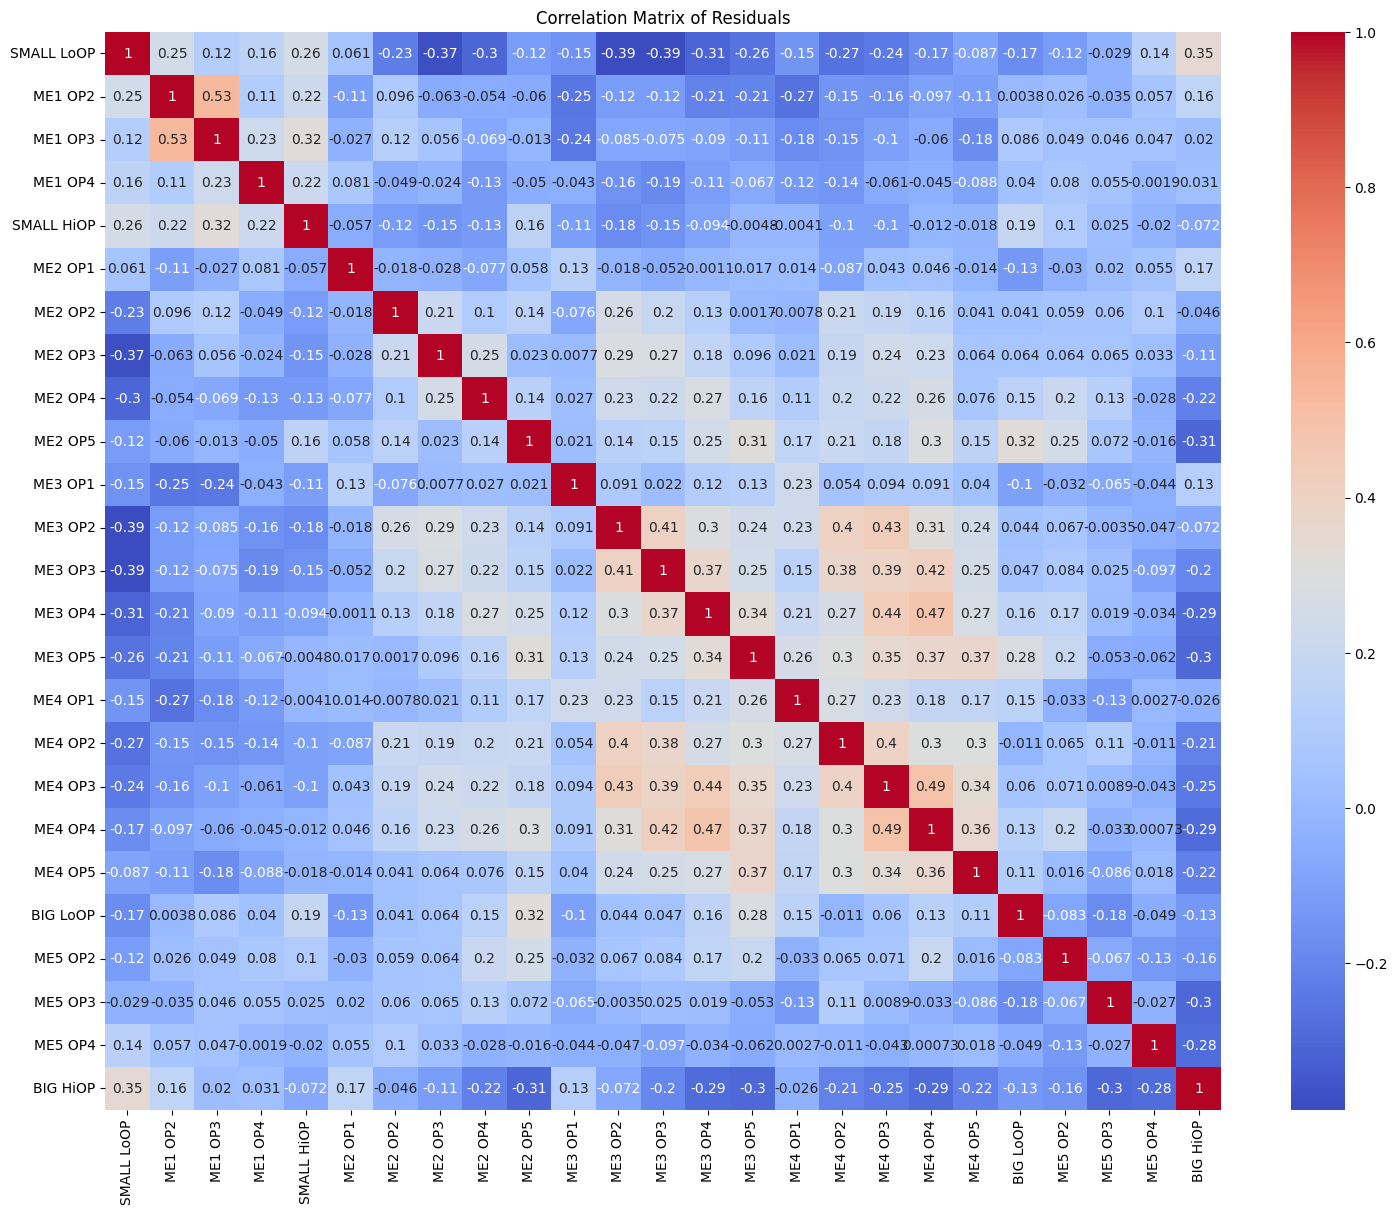

In [ ]:
#print residual correlation matrix
corr_matrix = correlation_of_residuals(results, portfolio_names)

**3.2:**

**If the correlations are close to zero, it suggests that the five factors do a good job in explaining the returns of these portfolios, leaving the residuals uncorrelated. However, if there are significant correlations between residuals, it may indicate that there are other common factors affecting the returns, which are not captured by the five-factor model. This would imply that the model doesn't fully explain the common variations in returns.**

#### 4. Display and comment on the averages of $\vert \alpha_{i} \vert$

In [ ]:
def display_average_abs_alpha(results, portfolio_names):
  avg_abs_alpha_list = []

  for portfolio in portfolio_names:
      #extracting the average absolute alpha for each portfolio
      avg_abs_alpha = results[portfolio]['five_factors']['avg_abs_alpha']
      avg_abs_alpha_list.append(avg_abs_alpha)
      print(f"Portfolio {portfolio} - Average |α|: {avg_abs_alpha}")

  #calculating the overall average
  overall_avg_abs_alpha = sum(avg_abs_alpha_list) / len(avg_abs_alpha_list)
  print(f"\nOverall Average |α|: {overall_avg_abs_alpha}")

In [ ]:
#apply function
display_average_abs_alpha(results, portfolio_names)

Portfolio SMALL LoOP - Average |α|: 0.17067985763292187
Portfolio ME1 OP2 - Average |α|: 0.06935004741332511
Portfolio ME1 OP3 - Average |α|: 0.19371723204427313
Portfolio ME1 OP4 - Average |α|: 0.1692622158036697
Portfolio SMALL HiOP - Average |α|: 0.2866830772671157
Portfolio ME2 OP1 - Average |α|: 0.12122445732035461
Portfolio ME2 OP2 - Average |α|: 0.2640555155186937
Portfolio ME2 OP3 - Average |α|: 0.23538293732623972
Portfolio ME2 OP4 - Average |α|: 0.2755653748625349
Portfolio ME2 OP5 - Average |α|: 0.1907268468341863
Portfolio ME3 OP1 - Average |α|: 0.06573616426012462
Portfolio ME3 OP2 - Average |α|: 0.2633207662277331
Portfolio ME3 OP3 - Average |α|: 0.24668634314369078
Portfolio ME3 OP4 - Average |α|: 0.28158548752347623
Portfolio ME3 OP5 - Average |α|: 0.17103174487188338
Portfolio ME4 OP1 - Average |α|: 0.0207710215392136
Portfolio ME4 OP2 - Average |α|: 0.21167652758956315
Portfolio ME4 OP3 - Average |α|: 0.2654013400906673
Portfolio ME4 OP4 - Average |α|: 0.2912099012926

**Comment: A high average absolute alpha might suggest that the factor model doesn't fully capture all the influences on the asset returns, indicating the presence of other factors or a specific risk that is unaccounted for. A low average absolute alpha implies that the factor model does a good job in explaining the returns, leaving little unexplained by the model**

# IV. GRS test (Gibbon, Ross and Shanken (1989)) of frontier efficiency

The GRS test checks whether the constants of the regressions of returns on the factors are simultaneously zero. The null hypothesis of the GRS test is:
$$
H_{0}: \alpha_{i}=0, \forall i=1,...,N
$$

We notice :
    
- $\hat{\alpha}= (\hat{\alpha}_{1},\hat{\alpha}_{2},...,\hat{\alpha}_{N} )'$ the column vector of N $\hat{\alpha}_{i}$
- $f_{t} = (f_{1t}, f_{2t},...,f_{kt})'$ the vector of *k* factors on date *t*
- $\hat{e}_{t} = (\hat{e}_{1t},...,\hat{e}_{Nt})'$ the vector of N residues at date *t*
- $\bar{f} = \frac{1}{T}\sum_{t=1}^{T}f_{t}$ the vector of the empirical means of the factors
- $\hat{\Omega} = \frac{1}{T}\sum_{t=1}^{T}f_{t}f_{t}^{'} - \bar{f}\bar{f }^{'}$ the covariance variance matrix of the factors
- $\hat{\Sigma} = \frac{1}{T-k-1}\sum_{t=1}^{T}e_{t}e_{t}^{'} $
                                                       
The statistic of the test for simultaneous nullity of constants is:

$$\hat{W}=\frac{T(T-N-k)}{N(T-k-1)}(1-\bar{f}^{'}\hat{\Omega}^{-1}\bar{ f})\hat{\alpha}^{'}\hat{\Sigma}^{-1}\hat{\alpha}$$
                                    
Under $H_{0}$ we have $\hat{W} \sim \mathcal{F}(N,T-N-k)$
                                    
#### 1. Programming and execution of the test
Build a function performing the GRS test and apply it to the different sets of factors (1, then 3, then 5 factors)

In [ ]:
import numpy as np
from scipy.stats import f

def grs_test(alpha, factors, residuals, T):
  #num of assets
  N = len(alpha)
  #num of factors
  k = factors.shape[1]
  #calc f_bar, Omega_hat, and Sigma_hat
  f_bar = np.mean(factors, axis=0)
  Omega_hat = np.cov(factors.T) - np.outer(f_bar, f_bar)
  Sigma_hat = np.cov(residuals.T)
  #calc GRS statistic
  W = (T - N - k) * (1 - np.dot(np.dot(f_bar.T, np.linalg.inv(Omega_hat)), f_bar)) * np.dot(np.dot(alpha.T, np.linalg.inv(Sigma_hat)), alpha)
  W /= N * (T - k - 1)
  #calc p-value from F-distribution
  p_value = 1 - f.cdf(W, N, T - N - k)
  return W, p_value

In [ ]:
#extract alphas and residuals from our regression
alphas = np.array([results[portfolio]['five_factors']['coefficients']['const'] for portfolio in portfolio_names])
residuals = np.array([results[portfolio]['five_factors']['residuals'] for portfolio in portfolio_names]).T
#extract factor data
#market factor
factors_market = five_factor_df[['Mkt-RF']].values
#3-factor
factors_three = five_factor_df[['Mkt-RF', 'SMB', 'HML']].values
#5-factor
factors_five = five_factor_df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].values

#### 2. Test result feedback
Report the test answers for each of the three sets of factors. Is there a set of factors for which the $\alpha_{i}$ are all simultaneously equal to 0?

In [ ]:
#Market factor
#apply GRS test
#num of observations
T = len(factors_market)
W, p_value = grs_test(alphas, factors_market, residuals, T)
print("GRS Statistic:", W)
print("P-Value:", p_value)

GRS Statistic: 0.022826023465831825
P-Value: 0.9999999999999999


In [ ]:
#3-factor
#apply GRS test
#num of observations
T = len(factors_three)
W, p_value = grs_test(alphas, factors_three, residuals, T)
print("GRS Statistic:", W)
print("P-Value:", p_value)

GRS Statistic: 0.02243118664262352
P-Value: 0.9999999999999999


In [ ]:
#5-factor
#apply GRS test
#num of observations
T = len(factors_five)
W, p_value = grs_test(alphas, factors_five, residuals, T)
print("GRS Statistic:", W)
print("P-Value:", p_value)

GRS Statistic: 0.020841022596812645
P-Value: 1.0


*GRS Statistic: 0.020841022596812645*
**This value is the calculated GRS statistic based on our data. It's a measure used to test the null hypothesis that the alphas from our model are jointly zero.**

*P-Value: 1.0*
**A p-value of 1.0 (or very close to 1) is quite high, which suggests that we cannot reject the null hypothesis. In the context of the GRS test, this means there's no statistical evidence to suggest that the alphas are different from zero.**

**This means: The high p-value implies that the model (whether it's the 1-factor, 3-factor, or 5-factor model) we've used does a good job in explaining the returns of the portfolios. With other words, the specific factors included in the model capture most of the systematic risk of the portfolios, leaving little unexplained by the model.
=>This result could indicate that the model is efficient in the sense that it adequately accounts for the returns of the portfolios in our sample.**